<a href="https://www.kaggle.com/code/muqaddasejaz/mental-health-in-tech-eda?scriptVersionId=271192553" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# **Import Libraries**

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc

# **Load/read the Dataset**

In [49]:
df = pd.read_csv("/kaggle/input/mental-health-in-tech-survey/survey.csv")


# **Data Exploration**

In [50]:
df.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [51]:
df.shape

(1259, 27)

In [52]:
df.columns

Index(['Timestamp', 'Age', 'Gender', 'Country', 'state', 'self_employed',
       'family_history', 'treatment', 'work_interfere', 'no_employees',
       'remote_work', 'tech_company', 'benefits', 'care_options',
       'wellness_program', 'seek_help', 'anonymity', 'leave',
       'mental_health_consequence', 'phys_health_consequence', 'coworkers',
       'supervisor', 'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence', 'comments'],
      dtype='object')

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

In [54]:
df.describe(include='O')

,Timestamp,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
count,1259,1259,1259,744,1241,1259,1259,995,1259,1259,...,1259,1259,1259,1259,1259,1259,1259,1259,1259,164
unique,1246,49,48,45,2,2,2,4,6,2,...,5,3,3,3,3,3,3,3,2,160
top,2014-08-27 12:31:41,Male,United States,CA,No,No,Yes,Sometimes,6-25,No,...,Don't know,No,No,Some of them,Yes,No,Maybe,Don't know,No,* Small family business - YMMV.
freq,2,615,751,138,1095,767,637,465,290,883,...,563,490,925,774,516,1008,557,576,1075,5


# **Data Preprocessing and Cleaning**

## Missing Values

In [55]:
missing_counts = df.isnull().sum()
print("Missing values per column:\n", missing_counts[missing_counts > 0])

Missing values per column:
 state              515
self_employed       18
work_interfere     264
comments          1095
dtype: int64


In [56]:
# For simplicity, drop 'comments' column since it has many missing values and is free-text
if 'comments' in df.columns:
    df = df.drop(columns=['comments'])

# Fill missing values in categorical columns with 'Unknown'
categorical_cols = df.select_dtypes(include='object').columns
for col in categorical_cols:
    df[col] = df[col].fillna('Unknown')

In [57]:
# For numeric columns (like 'Age'), fill missing values with median
if 'Age' in df.columns:
    df['Age'] = pd.to_numeric(df['Age'], errors='coerce')  # Convert to numeric, set errors to NaN
    df['Age'] = df['Age'].fillna(df['Age'].median()) 

In [58]:
df['Age'] = df['Age'].astype(int)

print("\nData after cleaning:")
print(df.info())


Data after cleaning:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      1259 non-null   object
 5   self_employed              1259 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             1259 non-null   object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null 

In [59]:
missing_counts = df.isnull().sum()
print("Missing values per column after cleaning:\n", missing_counts)

Missing values per column after cleaning:
 Timestamp                    0
Age                          0
Gender                       0
Country                      0
state                        0
self_employed                0
family_history               0
treatment                    0
work_interfere               0
no_employees                 0
remote_work                  0
tech_company                 0
benefits                     0
care_options                 0
wellness_program             0
seek_help                    0
anonymity                    0
leave                        0
mental_health_consequence    0
phys_health_consequence      0
coworkers                    0
supervisor                   0
mental_health_interview      0
phys_health_interview        0
mental_vs_physical           0
obs_consequence              0
dtype: int64


# **Exploratory Data Analysis (EDA)**

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


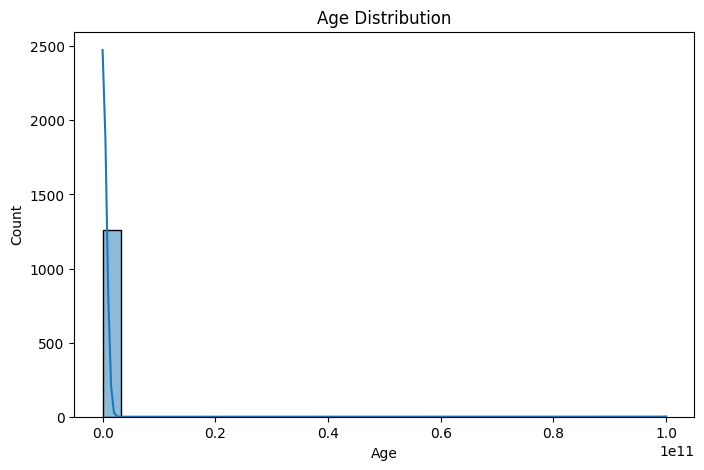

In [60]:
df['Age'] = df['Age'].replace([np.inf, -np.inf], np.nan)

# Fill missing values in 'Age' with median value (assign back, avoid inplace warning)
df['Age'] = df['Age'].fillna(df['Age'].median())

plt.figure(figsize=(8, 5))
sns.histplot(df['Age'], bins=30, kde=True)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

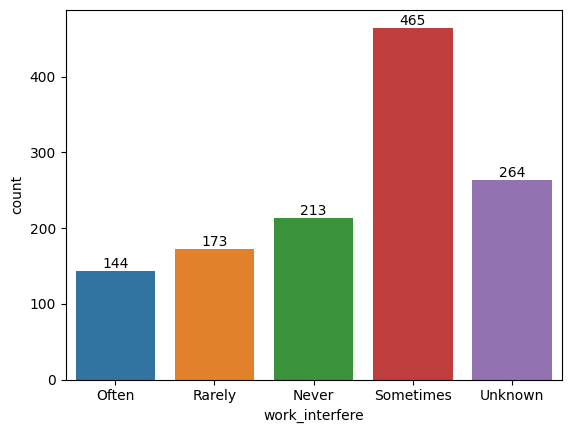

In [61]:
#Plot **work_interfere**
import seaborn as sns
ax = sns.countplot(data = df , x = 'work_interfere');
#Add the value of each parametr on the Plot
ax.bar_label(ax.containers[0]);

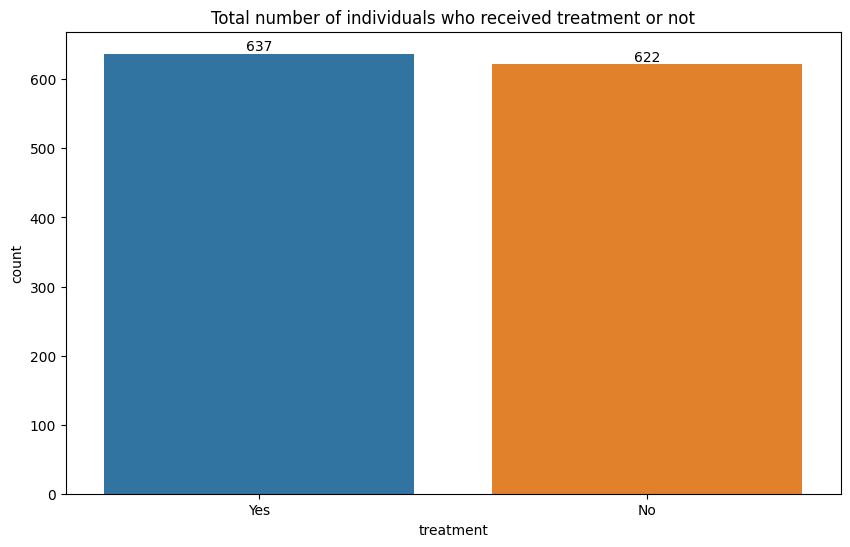

In [62]:
plt.figure(figsize = (10,6));
treat = sns.countplot(data = df,  x = 'treatment');
treat.bar_label(treat.containers[0]);
plt.title('Total number of individuals who received treatment or not');

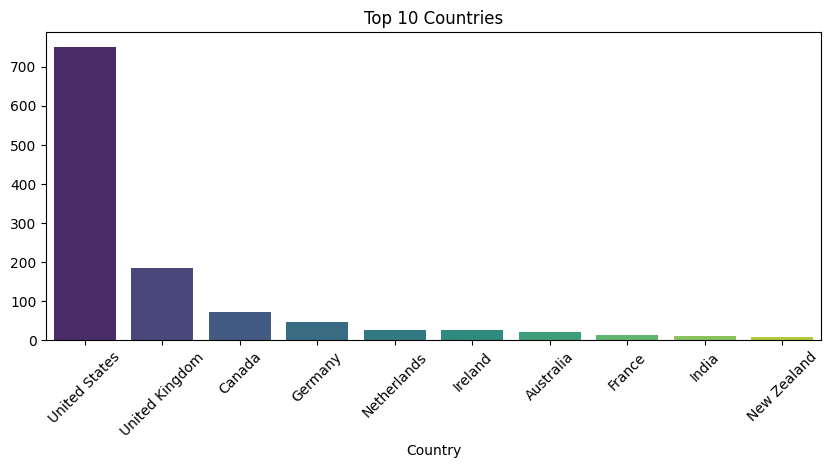

In [63]:
top_countries = df["Country"].value_counts().nlargest(10)
plt.figure(figsize=(10, 4))
sns.barplot(x=top_countries.index, y=top_countries.values, palette="viridis")
plt.xticks(rotation=45)
plt.title("Top 10 Countries")
plt.show()

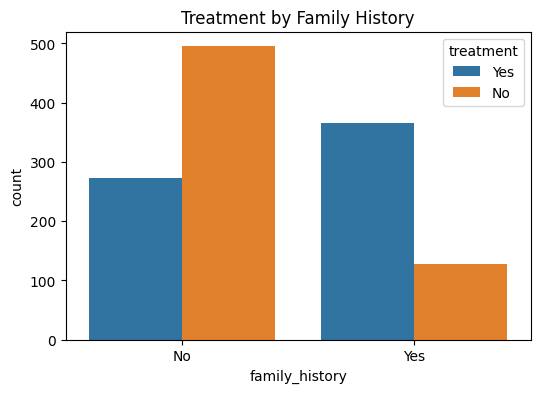

In [64]:

plt.figure(figsize=(6, 4))
sns.countplot(x='family_history', hue='treatment', data=df)
plt.title("Treatment by Family History")
plt.show()

In [65]:
df['Gender'] = df['Gender'].replace(['Male ', 'male', 'M', 'm', 'Male', 'Cis Male'], 'Male')
df['Gender'] = df['Gender'].replace(['Female ', 'female', 'F', 'f', 'Female', 'Cis Female'], 'Female')



print(df['Gender'].unique())


['Female' 'Male' 'Male-ish' 'maile' 'Trans-female' 'something kinda male?'
 'Woman' 'Mal' 'Male (CIS)' 'queer/she/they' 'non-binary' 'Femake' 'woman'
 'Make' 'Nah' 'All' 'Enby' 'fluid' 'Genderqueer' 'Androgyne' 'Agender'
 'cis-female/femme' 'Guy (-ish) ^_^' 'male leaning androgynous' 'Man'
 'Trans woman' 'msle' 'Neuter' 'Female (trans)' 'queer' 'Female (cis)'
 'Mail' 'cis male' 'A little about you' 'Malr' 'p' 'femail' 'Cis Man'
 'ostensibly male, unsure what that really means']


/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


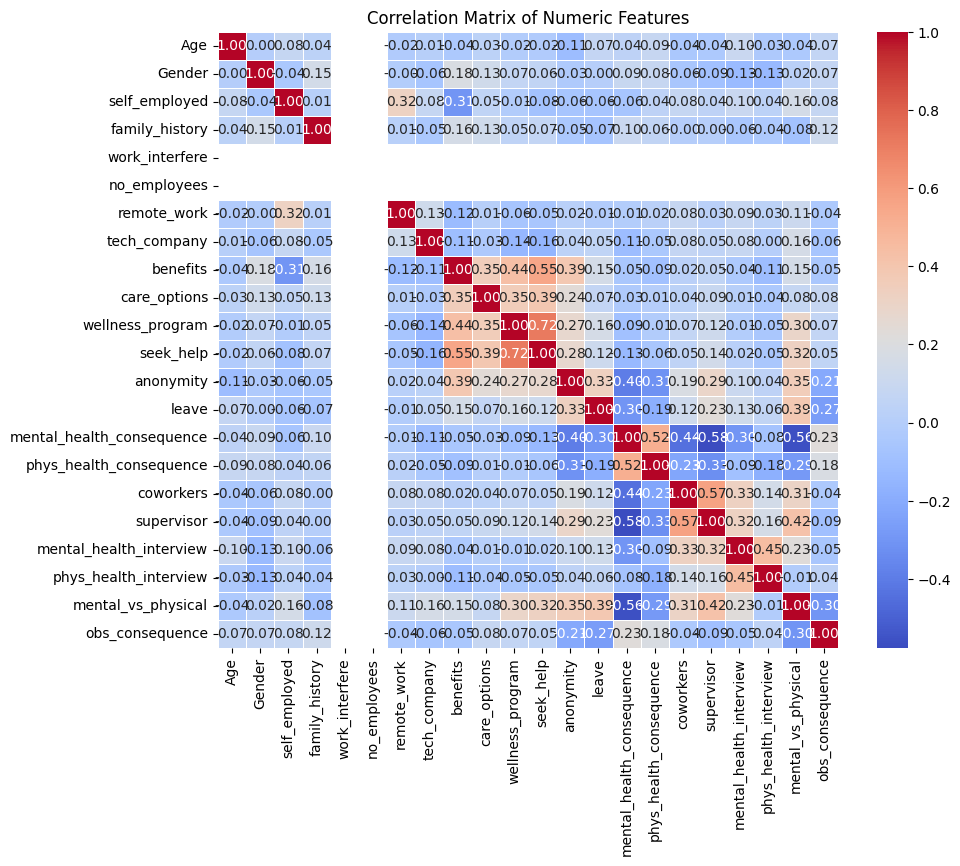

In [67]:

df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1, 'Unknown': 2})


categorical_cols = ['self_employed', 'family_history', 'work_interfere', 'no_employees', 'remote_work',
                    'tech_company', 'benefits', 'care_options', 'wellness_program', 'seek_help', 'anonymity',
                    'leave', 'mental_health_consequence', 'phys_health_consequence', 'coworkers', 'supervisor',
                    'mental_health_interview', 'phys_health_interview', 'mental_vs_physical', 'obs_consequence']


for col in categorical_cols:
    df[col] = df[col].map({'Yes': 1, 'No': 0, 'Maybe': 0.5, 'Somewhat easy': 1, 'Somewhat difficult': 0.5, 'Don\'t know': np.nan, 'Some of them': 0.5, 'None': 0})


numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
corr_matrix = df[numeric_cols].corr()


plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Numeric Features")
plt.show()

In [68]:

columns_to_encode = ['Country', 'state', 'self_employed', 'family_history', 
                     'work_interfere', 'no_employees', 'remote_work', 
                     'tech_company', 'benefits', 'care_options', 
                     'wellness_program', 'seek_help', 'anonymity', 
                     'leave', 'mental_health_consequence', 
                     'phys_health_consequence', 'coworkers', 
                     'supervisor', 'mental_health_interview', 
                     'phys_health_interview', 'mental_vs_physical', 
                     'obs_consequence']


existing_columns = [col for col in columns_to_encode if col in df.columns]


df = pd.get_dummies(df, columns=existing_columns, drop_first=True)


print("Shape after one-hot encoding:", df.shape)

Shape after one-hot encoding: (1259, 120)


# **Train/Test Split**

In [69]:
# X = df.drop(columns=['treatment'])
# y = df['treatment']

# **Training of Random Forest**

In [70]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.impute import SimpleImputer


if 'Timestamp' in df.columns:
    df= df.drop(columns=['Timestamp'])

X = df.drop(columns=['treatment'])
y = df['treatment']


imputer = SimpleImputer(strategy='median')
X_imputed = imputer.fit_transform(X)


X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.3, random_state=42)

print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)


rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)


Training data shape: (881, 118)
Testing data shape: (378, 118)


RandomForestClassifier(random_state=42)

In [71]:
y_pred = rf_model.predict(X_test)


In [72]:

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7116402116402116

Classification Report:
               precision    recall  f1-score   support

          No       0.69      0.71      0.70       181
         Yes       0.73      0.71      0.72       197

    accuracy                           0.71       378
   macro avg       0.71      0.71      0.71       378
weighted avg       0.71      0.71      0.71       378



# **Multiple Models:**

- Logistic Regression
- Random Forest
- XGBoost
- LightGBM

In [73]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, classification_report


y_train_encoded = y_train.map({'No': 0, 'Yes': 1})
y_test_encoded = y_test.map({'No': 0, 'Yes': 1})


models = {
    'Logistic Regression': LogisticRegression(max_iter=2000, random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    'LightGBM': LGBMClassifier(random_state=42)
}


results = {}


for name, model in models.items():
    
    if name in ['Logistic Regression', 'Random Forest']:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        acc = accuracy_score(y_test, y_pred)
        print(f"{name} Accuracy: {acc:.4f}")
        print(f"{name} Classification Report:")
        print(classification_report(y_test, y_pred))
    else:
        
        model.fit(X_train, y_train_encoded)
        y_pred = model.predict(X_test)
        acc = accuracy_score(y_test_encoded, y_pred)
        print(f"{name} Accuracy: {acc:.4f}")
        print(f"{name} Classification Report:")
        print(classification_report(y_test_encoded, y_pred))
    
    print("-" * 60)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL: .

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Accuracy: 0.6746
Logistic Regression Classification Report:
              precision    recall  f1-score   support

          No       0.75      0.48      0.58       181
         Yes       0.64      0.86      0.73       197

    accuracy                           0.67       378
   macro avg       0.70      0.67      0.66       378
weighted avg       0.69      0.67      0.66       378

------------------------------------------------------------
Random Forest Accuracy: 0.7116
Random Forest Classification Report:
              precision    recall  f1-score   support

          No       0.69      0.71      0.70       181
         Yes       0.73      0.71      0.72       197

    accuracy                           0.71       378
   macro avg       0.71      0.71      0.71       378
weighted avg       0.71      0.71      0.71       378

------------------------------------------------------------
XGBoost Accuracy: 0.6931
XGBoost Classification Report:
              precis

# **AUC-ROC Curve**

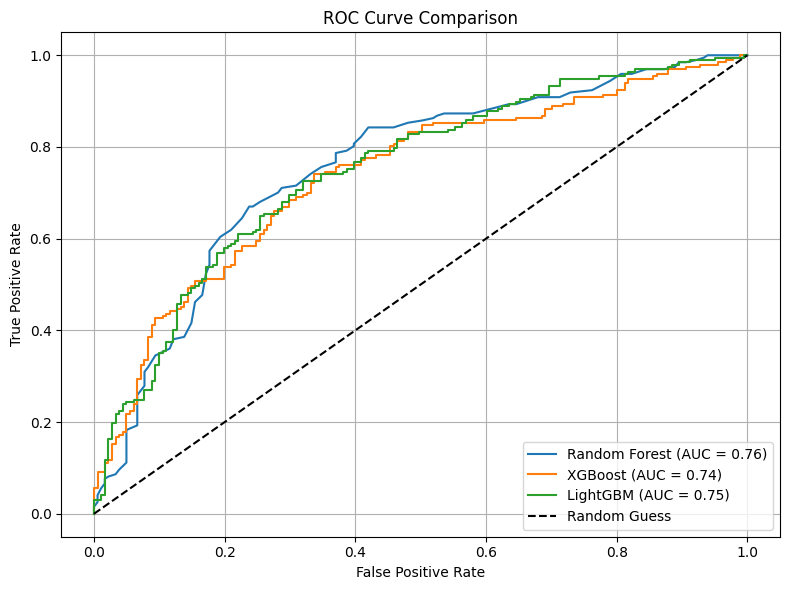

In [74]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc


model_list = [
    ('Random Forest', models['Random Forest'], y_test, False),
    ('XGBoost', models['XGBoost'], y_test_encoded, True),
    ('LightGBM', models['LightGBM'], y_test_encoded, True),
]

plt.figure(figsize=(8, 6))


for name, model, y_true, encoded in model_list:
    y_proba = model.predict_proba(X_test)[:, 1]  
    pos_label = 1 if encoded else 'Yes'         
    fpr, tpr, _ = roc_curve(y_true, y_proba, pos_label=pos_label)  
    roc_auc = auc(fpr, tpr)                     
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')


plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()

# **Save the Model**

In [76]:
import joblib


model_filename = 'random_forest_model.pkl'


joblib.dump(rf_model, model_filename)

print(f"Model saved to {model_filename}")


loaded_model = joblib.load(model_filename)

y_pred = loaded_model.predict(X_test)

Model saved to random_forest_model.pkl
